# Teste t Pareado: Comparando Pressão Arterial Antes e Depois de uma Intervenção

Este notebook foi elaborado para uma aula introdutória de testes estatísticos, demonstrando como comparar medidas antes e depois de uma intervenção utilizando o teste t pareado. O exemplo utiliza dados de pressão arterial coletados antes e após uma intervenção em um grupo de indivíduos.

## 1. Importação de Bibliotecas

Vamos começar importando as bibliotecas essenciais para análise de dados, visualização e execução de testes estatísticos: pandas, matplotlib.pyplot e scipy.stats.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 2. Carregamento e Visualização dos Dados

Carregue o conjunto de dados de pressão arterial e visualize as primeiras linhas para entender a estrutura dos dados.

In [2]:
# Carregar os dados de pressão arterial
df = pd.read_csv("https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance?select=student_habits_performance.csv")

# Visualizar as primeiras linhas do DataFrame
df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 2


## 3. Estatísticas Descritivas

Vamos calcular estatísticas descritivas (como média, desvio padrão e quartis) para as colunas de pressão arterial antes e depois da intervenção.

In [3]:
# Estatísticas descritivas para as colunas de interesse
df[['bp_before', 'bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


## 4. Visualização de Outliers

Utilize boxplots para identificar possíveis outliers nas medidas de pressão arterial antes e depois da intervenção.

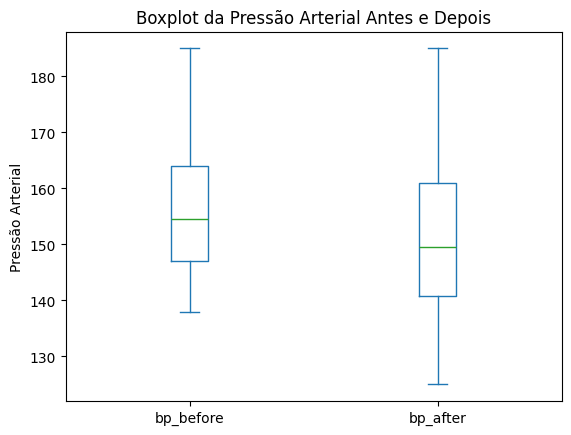

In [4]:
# Boxplot para identificar outliers
df[['bp_before', 'bp_after']].plot(kind='box', title='Boxplot da Pressão Arterial Antes e Depois')
plt.ylabel('Pressão Arterial')
plt.show()

## 5. Cálculo e Análise da Diferença das Medidas

Crie uma nova coluna com a diferença entre as pressões antes e depois. Em seguida, visualize a distribuição dessa diferença utilizando um histograma.

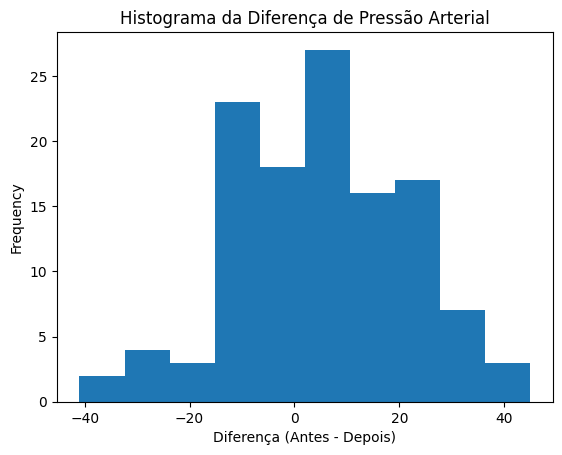

In [5]:
# Calcular a diferença entre as pressões antes e depois
df['bp_difference'] = df['bp_before'] - df['bp_after']

# Visualizar a distribuição da diferença
df['bp_difference'].plot(kind='hist', bins=10, title='Histograma da Diferença de Pressão Arterial')
plt.xlabel('Diferença (Antes - Depois)')
plt.show()

## 6. Verificação da Normalidade da Diferença

Antes de aplicar o teste t pareado, é importante verificar se a diferença segue uma distribuição normal. Vamos utilizar o gráfico Q-Q e o teste de Shapiro-Wilk para essa avaliação.

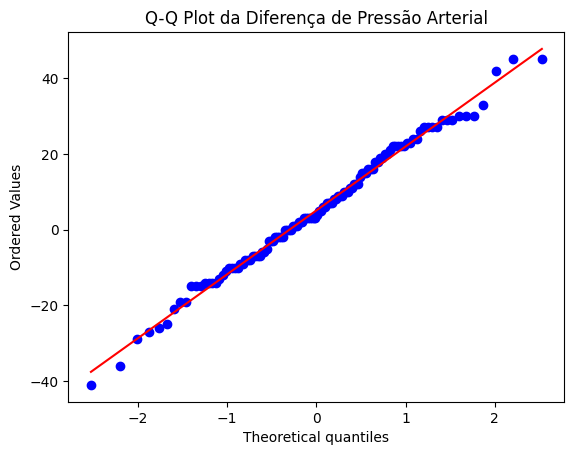

In [6]:
# Gráfico Q-Q para avaliar a normalidade
stats.probplot(df['bp_difference'], plot=plt)
plt.title('Q-Q Plot da Diferença de Pressão Arterial')
plt.show()

In [7]:
# Teste de Shapiro-Wilk para normalidade
stats.shapiro(df['bp_difference'])

ShapiroResult(statistic=np.float64(0.9926847193605787), pvalue=np.float64(0.7842279908227653))

### Interpretação

O p-value (0.78) é muito maior que o valor de referência comum (0.05). Portanto, **não rejeitamos a hipótese nula** de que os dados seguem uma distribuição normal.
Ou seja, **a diferença das pressões arteriais antes e depois do tratamento pode ser considerada normalmente distribuída**. Isso permite o uso de testes paramétricos, como o t-test pareado.

## 7. Execução do Teste t Pareado

Agora, vamos realizar o teste t pareado para comparar as médias das pressões arteriais antes e depois da intervenção (2 testes pareados, i.e., "**Pareados: mesmos indivíduos em diferentes situações**")

In [8]:
# Teste t pareado
stats.ttest_rel(df['bp_before'], df['bp_after'])

TtestResult(statistic=np.float64(3.3371870510833657), pvalue=np.float64(0.0011297914644840823), df=np.int64(119))

## 8. Interpretação dos Resultados

O teste t pareado compara as médias das duas condições (antes e depois) para o **mesmo grupo de indivíduos**.

- **Hipótese nula (H₀):** Não há diferença entre as médias das pressões arteriais antes e depois da intervenção.
- **Hipótese alternativa (H₁):** Existe diferença entre as médias das pressões arteriais antes e depois.

O valor-p obtido indica a probabilidade de observarmos uma diferença igual ou mais extrema que a encontrada, assumindo que a hipótese nula é verdadeira.

- Se o valor-p for menor que o nível de significância (por exemplo, 0,05), rejeitamos a hipótese nula e concluímos que a intervenção teve efeito significativo.
- Se o valor-p for maior que 0,05, não rejeitamos a hipótese nula.

No nosso caso:

In [9]:
p_value = stats.ttest_rel(df['bp_before'], df['bp_after']).pvalue

# Interpretação do p-valor
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: há diferença significativa entre as pressões arteriais antes e depois.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa entre as pressões arteriais antes e depois.")

Rejeitamos a hipótese nula: há diferença significativa entre as pressões arteriais antes e depois.


# Comparando preços de imóveis:

Verifique se existe diferença para imóveis à venda entre em termos de preço, preço m2 e área entre apartamentos e casas usando testes estatísticos e visualize as distribuições com boxplots.

In [10]:
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")

# filtrar os dados para incluir apenas os preços acima de 30.000 (venda)
houses = houses[houses['price'] > 30000]

houses['price_m2'] = houses['price']/houses['area']
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,price_m2
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,3837.209302
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,3109.756098
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,4000.000000
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,3092.783505
5,320000,-8.026516,-34.917791,2.0,50.0,1.0,2.0,1.0,Casa Amarela,Recife,Recife,Pernambuco,apart,6400.000000


In [11]:
houses['type'].value_counts()

,count
type,
apart,1148
house,72


## Box plots

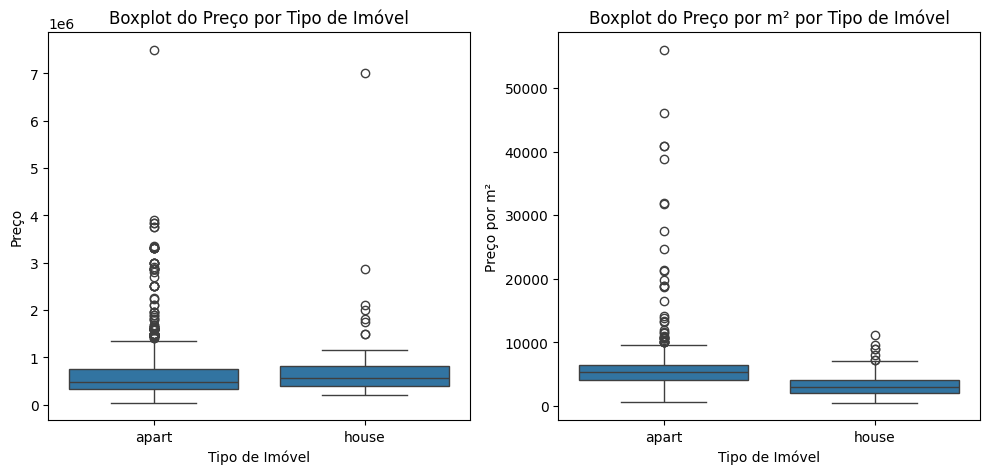

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=houses, x='type', y='price')
plt.title('Boxplot do Preço por Tipo de Imóvel')
plt.ylabel('Preço')
plt.xlabel('Tipo de Imóvel')

plt.subplot(1, 2, 2)
sns.boxplot(data=houses, x='type', y='price_m2')
plt.title('Boxplot do Preço por m² por Tipo de Imóvel')
plt.ylabel('Preço por m²')
plt.xlabel('Tipo de Imóvel')
plt.tight_layout()

plt.show()

## Identificando o tipo de teste a ser aplicado

![Tabela de tipos de testes de hipótese](https://raw.githubusercontent.com/ufrpe-ensino/ia-aulas/refs/heads/master/assets/images/hypothesis-tests-table.png)

### Verificando normalidade dos dados

O teste de Shapiro-Wilk é utilizado para verificar se uma amostra segue uma distribuição normal. Ele retorna um valor de estatística e um valor-p (p-value). Se o valor-p for maior que 0,05, não rejeitamos a hipótese nula de normalidade, ou seja, os dados podem ser considerados normalmente distribuídos. Se o valor-p for menor que 0,05, rejeitamos a hipótese nula, indicando que os dados não seguem uma distribuição normal.

Normalidade (Shapiro) - Preço Apto: ShapiroResult(statistic=np.float64(0.6545620870113875), pvalue=np.float64(3.830284347531854e-43))
Normalidade (Shapiro) - Preço Casa: ShapiroResult(statistic=np.float64(0.49653585891247876), pvalue=np.float64(2.5624579164839843e-14))


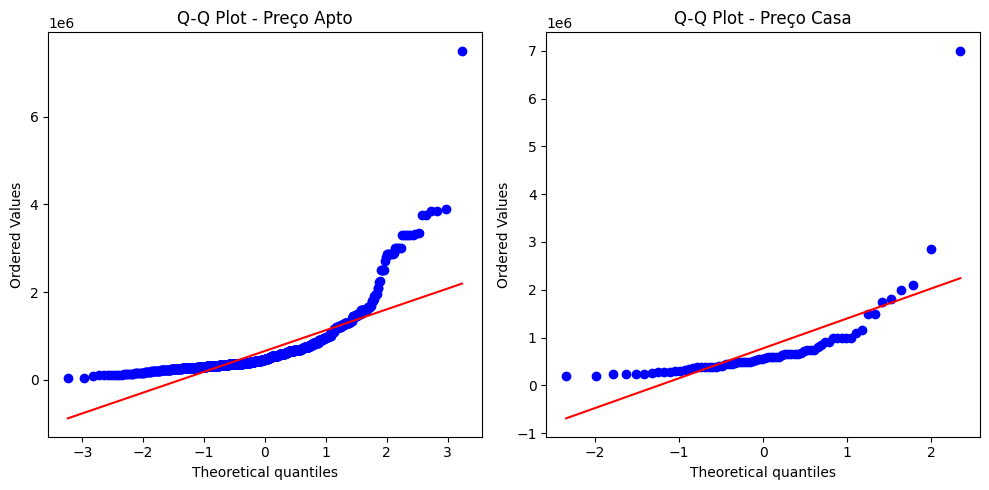

Os dados não seguem uma distribuição normal.


In [13]:
# 5. Testes de normalidade (Shapiro-Wilk)
print("Normalidade (Shapiro) - Preço Apto:", stats.shapiro(houses[houses['type'] == 'apart']['price']))
print("Normalidade (Shapiro) - Preço Casa:", stats.shapiro(houses[houses['type'] == 'house']['price']))

# qqplot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
stats.probplot(houses[houses['type'] == 'apart']['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot - Preço Apto')
plt.subplot(1, 2, 2)
stats.probplot(houses[houses['type'] == 'house']['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot - Preço Casa')
plt.tight_layout()
plt.show()

# verificar a normalidade dos dados
if stats.shapiro(houses['price'])[1] > 0.05:
    print("Os dados seguem uma distribuição normal.")
else:
    print("Os dados não seguem uma distribuição normal.")

Nesse caso, podemos usar o teste de Mann-Whitney para comparar os preços entre os dois tipos de imóveis.

### Aplicando o teste

In [23]:
# Teste de Mann-Whitney U
print("Teste de Mann-Whitney U entre os preços dos tipos de imóveis:")
print(f"pvalue: {stats.mannwhitneyu(houses[houses['type'] == 'apart']['price'],houses[houses['type'] == 'house']['price'])[1]}")

# conclusão
if stats.mannwhitneyu(houses[houses['type'] == 'apart']['price'],
                             houses[houses['type'] == 'house']['price'])[1] < 0.05:
    print("Rejeitamos a hipótese nula: há diferença significativa entre os preços dos tipos de imóveis.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa entre os preços dos tipos de imóveis.")

Teste de Mann-Whitney U entre os preços dos tipos de imóveis:
pvalue: 0.0842184084663507
Não rejeitamos a hipótese nula: não há diferença significativa entre os preços dos tipos de imóveis.


In [26]:
# mesmo teste para o preço por m2
print("Teste de Mann-Whitney U entre os preços por m2 dos tipos de imóveis:")
print(f"pvalue: {stats.mannwhitneyu(houses[houses['type'] == 'apart']['price_m2'], houses[houses['type'] == 'house']['price_m2'])[1]}")


# conclusão
if stats.mannwhitneyu(houses[houses['type'] == 'apart']['price_m2'],
                             houses[houses['type'] == 'house']['price_m2'])[1] < 0.05:
    print("Rejeitamos a hipótese nula: há diferença significativa entre os preços por m2 dos tipos de imóveis.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa entre os preços por m2 dos tipos de imóveis.")

Teste de Mann-Whitney U entre os preços por m2 dos tipos de imóveis:
pvalue: 1.3483508407725817e-15
Rejeitamos a hipótese nula: há diferença significativa entre os preços por m2 dos tipos de imóveis.


# Exercício

Realize a mesma análise comparando dois bairros que possuam um grande número de imóveis nos dados.

In [ ]:
# sua resposta